In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [2]:
# https://www.kaggle.com/datasets/ruiromanini/mtcars?resource=download DATASET
mtcars = pd.read_csv('./datasets/mtcars.csv')
mtcars.shape

(32, 12)

In [3]:
mtcars.head()
#mtcars['model'].unique().size

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
#summary of dataframe
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
#basic statistics --> read about that again if needed
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


# LineChart 
--> for line chart we dont have date values or something for temporally growth

some examples for Line chart (on different dataset) are on 05a_Matplotlib_Notebook

# BarChart

[6 4 8]


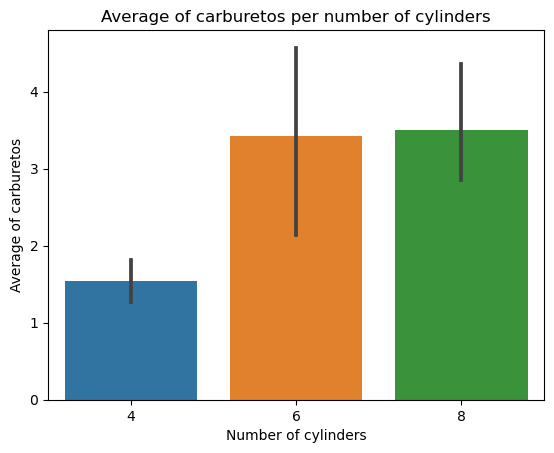

In [6]:
#Seaborn for barcharts
#cylinder and carburetos 

#  MAKE A BARPLOT
#if we use barplot for default, aggregation fun will be AVERAGE!!! - add estimator=sum in .barplot() (if we want to change the operation) or just use countplot
#bars will be sorted from shortest to highest by default
#znaci grupisace kola koja imaju isti broj cilindara i racunace prosecan broj karburatora za njih
groupsOfCyl=mtcars['cyl'].unique()
print(groupsOfCyl)
res=sns.barplot(x=mtcars['cyl'], y=mtcars['carb'], data=mtcars)

#  ADD LABELS AND TITLE
plt.xlabel('Number of cylinders')
plt.ylabel('Average of carburetos')
plt.title('Average of carburetos per number of cylinders')
plt.show()

#black lines are ERROR BARS --> ERROR BARS - get by default - ci=None in barplot to remove them
# --> standard deviation from average number (or mean)
# The wider (sire) the spread of scores, the larger the standard deviation. 
# so for cars with 4 number of cyl is a smaller st dev so the spread of carburators is narrower (mala su odstupanja od prosecnog broja karburatora nego kod kola sa drugim brojem cilindara)

# Histograms

20.090625000000003
19.2
32
10.4
33.9


<Axes: xlabel='mpg', ylabel='Count of cars for that number of mpg'>

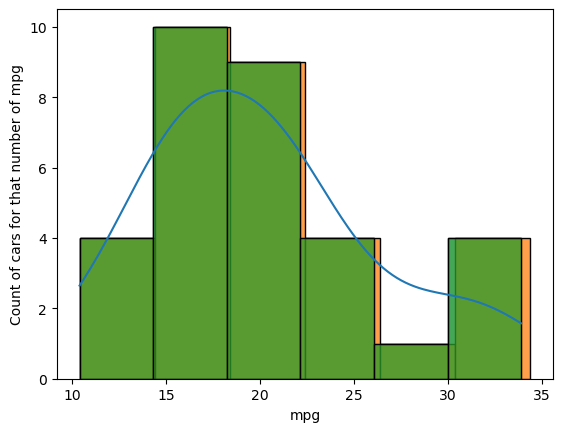

In [7]:
# distribution of miles per galon
sns.histplot(data=mtcars, x=mtcars['mpg'], kde=True)
#plt is used for other custom plot manipulation
plt.ylabel('Count of cars for that number of mpg')

#kde - density estimate to smooth the histogram - shape of the dist

print(mtcars['mpg'].mean())
print(mtcars['mpg'].median())
print(mtcars['mpg'].count())
print(mtcars['mpg'].min())
print(mtcars['mpg'].max())
#number of bins - koren iz 32 je oko 6
#size of bin - k=(max-min)/h --> h=(max-min)/k=(33.9-10.4)/6=blizu 4

#new one - but i will use the default
#every hist is on the same plot in this case (dont know why)
sns.histplot(data=mtcars, x=mtcars['mpg'], binwidth=4) #vrlo je slican
sns.histplot(data=mtcars, x=mtcars['mpg'], bins=6)#vrlo je slican

#COMM - The histogram shows that the distribution of miles per galon is right skewed.
# most cars use between 15 and 20 liters of fuel per mile
# histogram is bimodal ---> has to pics
# median is between 15 and 20 and mean the same
# spread is about 23 values 
# not outliers (for example some bin on 50 on x-axis)

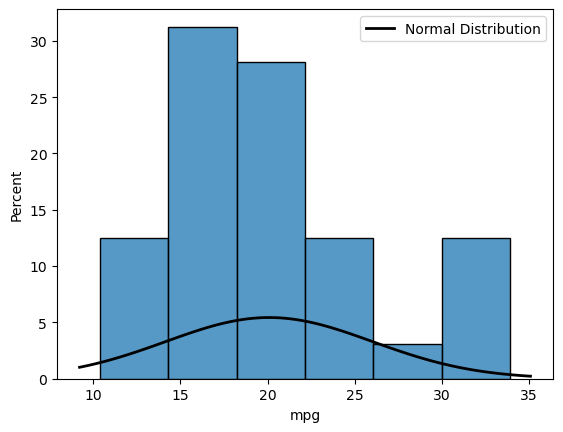

In [8]:
# instead of count show percentage
sns.histplot(data=mtcars, x=mtcars['mpg'], stat="percent")

#see if the fit normal distribution
# Overlay normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(mtcars['mpg']), np.std(mtcars['mpg'])) * (xmax - xmin) * (100 / len(mtcars['mpg']))
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
plt.legend()

#dont fits normal distr because it is a litlle bit right skewed

# BOX PLOT/WHISKERS PLOT

<Axes: xlabel='cyl', ylabel='mpg'>

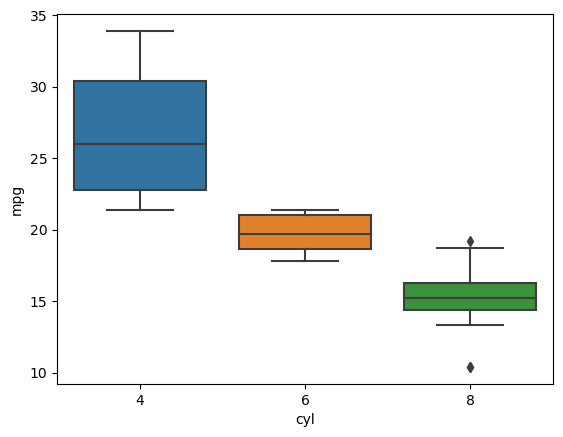

In [9]:
#box plot of mpg (miles per galon) for every number of cyl - za svaki broj cilindara gledamo potrosnju pa da vidimo
sns.boxplot(x='cyl', y='mpg', data=mtcars)


#--> how to comment: vidimo da najvecu potrosnju imaju vozila sa 4 cilindra, 
#a najmanju sa 8 cilindara ali pritom imaju najvise odstupanja u potrosnji
#najmanja odstupanja imaju vozila sa 6 cilindara ali i srednju potrosnju
#pa onda malo pogledati raspodelu i rasutost (nijedan uzorak nije previse rasut)

# SCATTER PLOT

In [10]:
# i will use Iris dataset now

In [12]:
iris=sns.load_dataset('iris') #have it in seaborn

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='petal_length'>

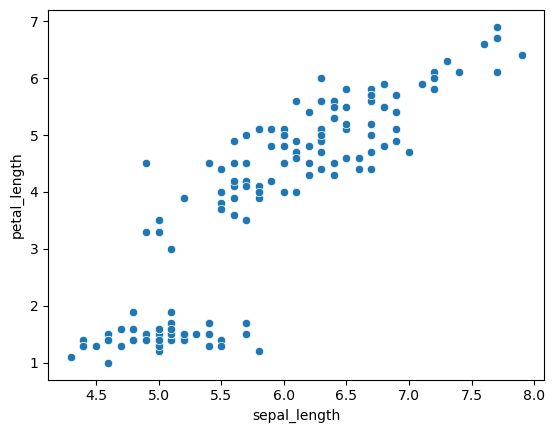

In [16]:
#relationship between sepal length and petal length
sns.scatterplot(x='sepal_length', y='petal_length', data=iris)

#when i run this I see some correlation between this vars and probably some groups so I will add the third cat var - species

<Axes: xlabel='sepal_length', ylabel='petal_length'>

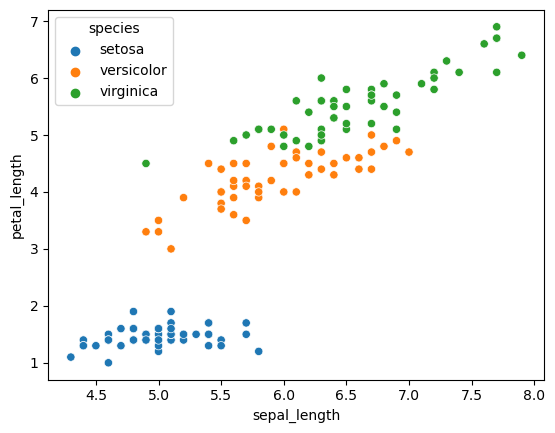

In [17]:
sns.scatterplot(x='sepal_length', y='petal_length', data=iris, hue='species')
#I see some oitliers from groups to and we can see the correlation between vars in groups